##Range Forward 전략
Range Forward 전략은 환율 변동성을 관리하기 위한 전략으로, 주로 기업이 환율 변동에 따른 리스크를 헷지하기 위해 사용됩니다. 이 전략은 통화 옵션의 매수와 매도로 구성되며, 주어진 범위 내에서 일정한 환율을 보장받는 동시에 초과 변동에 대해 노출을 최소화합니다.

[*********************100%%**********************]  1 of 1 completed
<ipython-input-1-3e23f5e0200d>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Stock Return'] = data['Stock Price'].pct_change().fillna(0)
<ipython-input-1-3e23f5e0200d>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Call Buy Profit/Loss'] = np.where(stock_data['Stock Price'] > strike_price_call_buy,
<ipython-input-1-3e23f5e0200d>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

            Stock Price  Stock Return  Range Forward Profit  \
Date                                                          
2023-01-03   125.070000      0.000000              6.000000   
2023-01-04   126.360001      0.010314              6.000000   
2023-01-05   125.019997     -0.010605              6.000000   
2023-01-06   129.619995      0.036794              6.000000   
2023-01-09   130.149994      0.004089              5.850006   
...                 ...           ...                   ...   
2023-12-22   193.600006     -0.005547              6.000000   
2023-12-26   193.050003     -0.002841              6.000000   
2023-12-27   193.149994      0.000518              6.000000   
2023-12-28   193.580002      0.002226              6.000000   
2023-12-29   192.529999     -0.005424              6.000000   

            Range Forward Return  
Date                              
2023-01-03              0.000000  
2023-01-04              0.047973  
2023-01-05              0.047483  
2023-

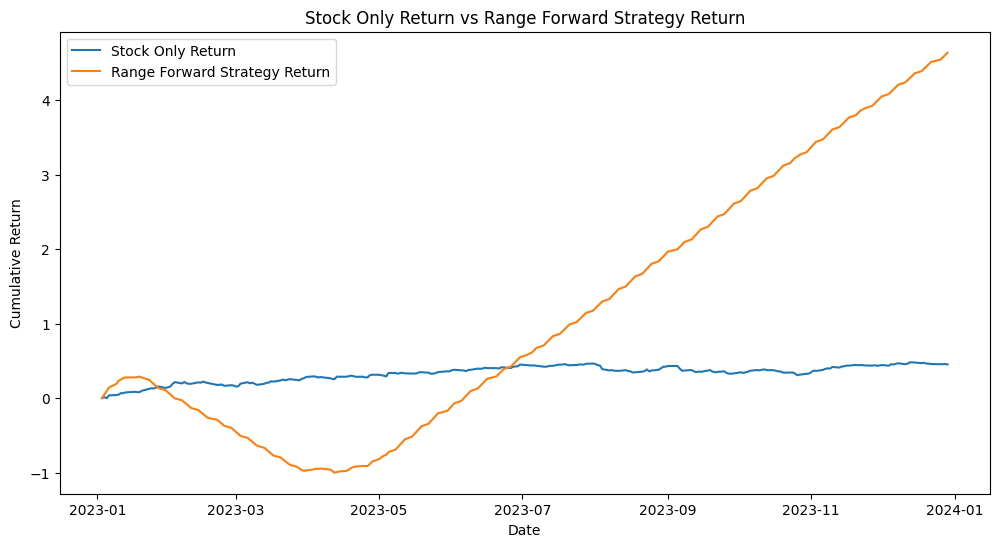

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 다운로드
ticker = 'AAPL'  # 예시로 애플 주식을 사용
data = yf.download(ticker, start="2023-01-01", end="2024-01-01")

# 종가 데이터 사용
data = data[['Close']]
data.columns = ['Stock Price']

# Range Forward 설정
strike_price_call_buy = 160
strike_price_call_sell = 170
strike_price_put_buy = 140
strike_price_put_sell = 130
premium_paid_call = 5    # 콜 옵션 매수 시 지불한 프리미엄 (예시)
premium_received_call = 3  # 콜 옵션 매도 시 받은 프리미엄 (예시)
premium_paid_put = 4     # 풋 옵션 매수 시 지불한 프리미엄 (예시)
premium_received_put = 2   # 풋 옵션 매도 시 받은 프리미엄 (예시)

# 주식만 보유한 경우의 수익률 계산
data['Stock Return'] = data['Stock Price'].pct_change().fillna(0)

# Range Forward 수익 계산 함수
def calculate_range_forward(stock_data, strike_price_call_buy, strike_price_call_sell, strike_price_put_buy, strike_price_put_sell, premium_paid_call, premium_received_call, premium_paid_put, premium_received_put):
    # 콜 옵션 손익 계산
    stock_data['Call Buy Profit/Loss'] = np.where(stock_data['Stock Price'] > strike_price_call_buy,
                                                  stock_data['Stock Price'] - strike_price_call_buy,
                                                  0) - premium_paid_call
    stock_data['Call Sell Profit/Loss'] = np.where(stock_data['Stock Price'] > strike_price_call_sell,
                                                   strike_price_call_sell - stock_data['Stock Price'],
                                                   0) + premium_received_call

    # 풋 옵션 손익 계산
    stock_data['Put Buy Profit/Loss'] = np.where(stock_data['Stock Price'] < strike_price_put_buy,
                                                 strike_price_put_buy - stock_data['Stock Price'],
                                                 0) - premium_paid_put
    stock_data['Put Sell Profit/Loss'] = np.where(stock_data['Stock Price'] < strike_price_put_sell,
                                                  stock_data['Stock Price'] - strike_price_put_sell,
                                                  0) + premium_received_put

    # Range Forward 전략의 총 수익 계산
    stock_data['Range Forward Profit'] = (stock_data['Call Buy Profit/Loss'] + stock_data['Call Sell Profit/Loss'] +
                                          stock_data['Put Buy Profit/Loss'] + stock_data['Put Sell Profit/Loss'])

    # 총 수익률 계산
    stock_data['Range Forward Return'] = stock_data['Range Forward Profit'] / stock_data['Stock Price'].shift(1)
    stock_data['Range Forward Return'].iloc[0] = 0  # 첫 번째 값은 손익 없음으로 설정

    return stock_data

# 수익 계산 실행
range_forward_results = calculate_range_forward(data, strike_price_call_buy, strike_price_call_sell, strike_price_put_buy, strike_price_put_sell, premium_paid_call, premium_received_call, premium_paid_put, premium_received_put)

# 결과 출력
print(range_forward_results[['Stock Price', 'Stock Return', 'Range Forward Profit', 'Range Forward Return']])

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(range_forward_results.index, range_forward_results['Stock Return'].cumsum(), label='Stock Only Return')
plt.plot(range_forward_results.index, range_forward_results['Range Forward Return'].cumsum(), label='Range Forward Strategy Return')
plt.title('Stock Only Return vs Range Forward Strategy Return')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

